In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np


import sys
sys.path.append('../')
from dataset import CIFAR10_captioning

In [2]:
data_dir_path = os.path.join(os.getcwd(), "../", "data")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# make download true to download data!
trainset = CIFAR10_captioning(root=data_dir_path, train=True, download=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
                                          
testset = CIFAR10_captioning(root=data_dir_path, train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = trainset.classes
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


torch.Size([4, 3, 32, 32]) torch.Size([4, 7])


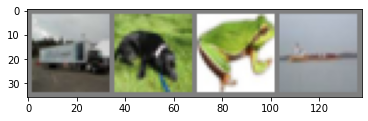

tensor([[14,  0,  1,  2,  3, 13, 15],
        [14,  0,  1,  2,  3,  9, 15],
        [14,  0,  1,  2,  3, 10, 15],
        [14,  0,  1,  2,  3, 12, 15]])
<SOS> An image of a truck <EOS>
<SOS> An image of a dog <EOS>
<SOS> An image of a frog <EOS>
<SOS> An image of a ship <EOS>


In [6]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, (labels, _) = next(dataiter)

print(images.size(), labels.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
for b in range(batch_size):
    print(' '.join([trainset.vocab[int(i)] for i in labels[b]]))

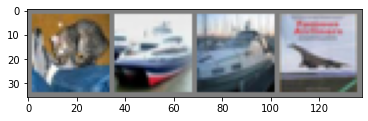

tensor([[14,  0,  1,  2,  3,  7, 15],
        [14,  0,  1,  2,  3, 12, 15],
        [14,  0,  1,  2,  3, 12, 15],
        [14,  0,  1,  2,  3,  4, 15]])
<SOS> An image of a cat <EOS>
<SOS> An image of a ship <EOS>
<SOS> An image of a ship <EOS>
<SOS> An image of a plane <EOS>


In [8]:
# get some random test images
dataiter = iter(testloader)
images, (labels, _) = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
for b in range(batch_size):
    print(' '.join([trainset.vocab[int(i)] for i in labels[b]]))

In [9]:
print(images[0].size())

torch.Size([3, 32, 32])
